In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [31]:
train_vals = pd.read_csv('train_values.csv').drop(columns = 'patient_id')
train_labs = pd.read_csv('train_labels.csv').drop(columns = 'patient_id')
train_set = pd.read_csv('train_values.csv').drop(columns = 'patient_id')
train_set['heart_disease_present'] = train_labs['heart_disease_present']
test_values = pd.read_csv('test_values.csv')

train_vals.head()


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [32]:
train_set.head()
#train_set.to_csv('clean_data.csv')

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


need to convert text data to quantitative data... how many unique elements are there?

In [33]:
train_set['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

## def quantize_thal(thal_text):
    thal_elements = ['normal', 'reversible_defect', 'fixed_defect']
    return thal_elements.index(thal_text)

train_set['quant_thal'] = train_set['thal'].apply(quantize_thal)
train_vals['quant_thal'] = train_vals['thal'].apply(quantize_thal)
train_vals = train_vals.drop(columns = 'thal')
train_set = train_set.drop(columns = 'thal')
train_set.to_csv('clean_data.csv')

    

In [35]:
train_set.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,quant_thal
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,1


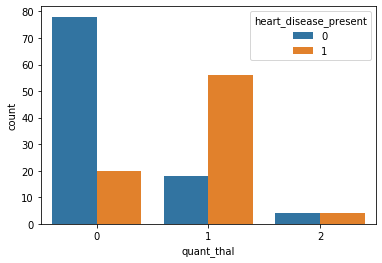

In [15]:
sns.countplot(x = 'quant_thal', hue = 'heart_disease_present', data = train_set)

In [44]:
#sns.pairplot(train_set, hue = 'heart_disease_present')

# Standardizing the Data

In [16]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(train_vals)
scaled_train_vals = scaler.transform(train_vals)
scaled_train_vals = pd.DataFrame(scaled_train_vals, columns = train_vals.columns)

# Spliting into train and test data

In [46]:
from sklearn.model_selection import train_test_split
test_size = 0.33

x_train, x_test, y_train, y_test = train_test_split(train_vals, train_labs, test_size = test_size, random_state = 42)
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(scaled_train_vals, train_labs, test_size = test_size, random_state = 101)


#  Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression as LM

log_model = LM()
log_model.fit(x_train, y_train)

C:\Users\nateo\Anaconda3\envs\Algorithmic Trading\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nateo\Anaconda3\envs\Algorithmic Trading\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
log_pred = log_model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix, precision_score, log_loss

print(classification_report(log_pred, y_test))
print(log_loss(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81        35
           1       0.70      0.92      0.79        25

    accuracy                           0.80        60
   macro avg       0.81      0.82      0.80        60
weighted avg       0.83      0.80      0.80        60

6.907781932229811


#  Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
log_loss_list = []
n_est_list = []
rng = 100

for i in range(1,rng):
    rfc = RandomForestClassifier(n_estimators=i)
    n_est_list.append(i)
    forest_train = np.asarray(y_train).ravel()
    rfc.fit(x_train,forest_train)
    forest_pred_i = rfc.predict(x_test)
    log_loss_list.append(log_loss(y_test, forest_pred_i))
best_value = n_est_list[log_loss_list.index(min(log_loss_list))]
print('Best Value for estimator: ', best_value, ' Loss: ', min(log_loss_list))

rfc = RandomForestClassifier(n_estimators=best_value)
forest_train = np.asarray(y_train).ravel()
rfc.fit(x_train,forest_train)
forest_pred = rfc.predict(x_test)
print(log_loss(y_test, forest_pred))


ModuleNotFoundError: No module named 'tqdm'

In [51]:
plt.figure(figsize = (10,6))
plt.plot(log_loss_list, color = 'blue', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title('Loss vs N estimators')
plt.xlabel('N')
plt.ylabel('loss')

NameError: name 'log_loss_list' is not defined

<Figure size 720x432 with 0 Axes>

In [52]:
rfc = RandomForestClassifier(n_estimators=52)
forest_train = np.asarray(y_train).ravel()
rfc.fit(x_train,forest_train)
forest_pred = rfc.predict(x_test)
print(log_loss(y_test, forest_pred))

6.907755278982137


In [53]:
print(classification_report(y_test,forest_pred))
print(log_loss(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        27
           1       1.00      0.64      0.78        33

    accuracy                           0.80        60
   macro avg       0.85      0.82      0.80        60
weighted avg       0.86      0.80      0.80        60

6.907755278982137


# Naive Bayes Algorithm

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_y_train = np.asarray(y_train).ravel()
nb.fit(x_train, nb_y_train)

nb_pred = nb.predict(x_test)
print(classification_report(nb_pred, y_test))
log_loss(nb_pred, y_test)



              precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       0.64      1.00      0.78        21

    accuracy                           0.80        60
   macro avg       0.82      0.85      0.80        60
weighted avg       0.87      0.80      0.80        60



6.907915198468176

# KNN Algorithm 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighboors = 40 gives precision = 1 for class 1
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(scaled_x_train, scaled_y_train)
knn_pred = knn.predict(scaled_x_test)
print(classification_report(y_test,knn_pred))
print(log_loss(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.38      0.56      0.45        27
           1       0.43      0.27      0.33        33

    accuracy                           0.40        60
   macro avg       0.41      0.41      0.39        60
weighted avg       0.41      0.40      0.39        60

20.723425756432448


C:\Users\nateo\Anaconda3\envs\Algorithmic Trading\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [56]:
log_losses = []
rng = 120

scaled_y_train = np.asarray(scaled_y_train).ravel()


for i in range(1,rng):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train, scaled_y_train)
    pred_i = knn.predict(scaled_x_test)
    log_losses.append(log_loss(y_test, pred_i))

best_value = log_losses.index(min(log_losses)) + 1
print(best_value)

1


Text(0, 0.5, 'Loss')

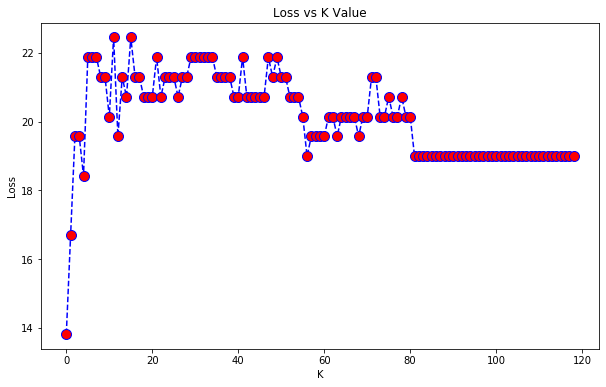

In [57]:
plt.figure(figsize = (10,6))
plt.plot(log_losses, color = 'blue', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title('Loss vs K Value')
plt.xlabel('K')
plt.ylabel('Loss')

# Combining KNN and Logistic Regression

In [58]:
def combine(preds0, preds1):
    if len(preds0) != len(preds1):
        print('Error: prediction arrays are not the same length')
    new_preds = [x for i in range(len(preds0) - 1)]
    one_preds = []
    zero_preds = []
    pred1_dict = list(enumerate(preds1))
    pred0_dict = list(enumerate(preds0))
    
    for i in range(len(preds1) - 1):
        if pred1_dict[i][1] == 1:

                
            
    
    
    
    
pred1_dicts = list(enumerate(forest_pred))

print(pred1_dict)
        

IndentationError: expected an indented block (<ipython-input-58-0d27a87a37ab>, line 19)

In [59]:
best_pred = combine(preds0 = nb_pred, preds1 = forest_pred)

print(len(best_pred))
print(type(nb_pred))
#print(classification_report(y_test,best_pred))


NameError: name 'combine' is not defined

# AI model 

In [81]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
model = tf.keras.Sequential()
import keras

inputs = tf.keras.Input(shape = (13,))
x = layers.Dense(64, activation = 'relu')(inputs)
x = layers.Dense(64, activation = 'relu')(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=predictions)


model.compile( optimizer = tf.keras.optimizers.RMSprop(),
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [91]:
model.fit(scaled_x_train, scaled_y_train, batch_size = 10, epochs = 100 )

Train on 120 samples
Epoch 1/100
120/120 [==============================] - 0s 183us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
120/120 [==============================] - 0s 167us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
120/120 [==============================] - 0s 158us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
120/120 [==============================] - 0s 183us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
120/120 [==============================] - 0s 150us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
120/120 [==============================] - 0s 162us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
120/120 [==============================] - 0s 250us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
120/120 [==============================] - 0s 167us/sample - loss: 1.19

120/120 [==============================] - 0s 142us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 64/100
120/120 [==============================] - 0s 158us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 65/100
120/120 [==============================] - 0s 142us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 66/100
120/120 [==============================] - 0s 141us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 67/100
120/120 [==============================] - 0s 133us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 68/100
120/120 [==============================] - 0s 142us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 69/100
120/120 [==============================] - 0s 125us/sample - loss: 1.1921e-07 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
120/120 [==============================] - 0s 125us/sample - loss: 1.1921e-07 - sparse_categorica

In [89]:
def convert(preds):
    new_preds = []
    for pred in preds:
        if pred[0] > pred[1]:
            new_preds.append(0)
        else:
            new_preds.append(1)
    return new_preds

In [92]:
import numpy as np
X = np.asarray(scaled_x_test)
preds = model.predict(X)
preds = convert(preds)

print(classification_report(scaled_y_test,preds))
print(log_loss(scaled_y_test, preds))


              precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.87      0.76      0.81        34

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60

6.907808585477483
